In [35]:
from pathlib import Path
import shutil
import os
import logging
import sys
import pandas as pd
sys.path.append('..')

from textblob import TextBlob
from pprint import pprint
from sklearn.metrics import classification_report

from transformers import AutoModelForSequenceClassification, BertTokenizer

from finbert.finbert import *
import finbert.utils as tools

%load_ext autoreload
%autoreload 2

project_dir = Path.cwd().parent
pd.set_option('max_colwidth', -1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<ipython-input-35-9c2fc94a936e>:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.ERROR)

### Setting path variables:
1. `lm_path`: the path for the pre-trained language model (If vanilla Bert is used then no need to set this one).
2. `cl_path`: the path where the classification model is saved.
3. `cl_data_path`: the path of the directory that contains the data files of `train.csv`, `validation.csv`, `test.csv`.
---

In the initialization of `bertmodel`, we can either use the original pre-trained weights from Google by giving `bm = 'bert-base-uncased`, or our further pre-trained language model by `bm = lm_path`


---
All of the configurations with the model is controlled with the `config` variable. 

In [3]:
cl_path = project_dir/'models'/'saved_models'
cl_data_path = project_dir/'data'/'sentiment_data'

In [4]:
lm_path = 'ProsusAI/finbert'


In [5]:
bertmodel = AutoModelForSequenceClassification.from_pretrained(lm_path,cache_dir=None, num_labels=3)

In [17]:
os.getcwd()

'g:\\xasm\\ftds_capstone\\FTDS_capstone\\Misc\\NLP_SA - Copy\\finBERT-master\\finBERT-master\\notebooks'

In [18]:
df = pd.read_csv('../../../../../data/dataset/stock_data/raw_PLTR.csv')

In [47]:
token_lens = []

for txt in df.content:

  tokens = tokenizer.encode(txt, max_length=1024)

  token_lens.append(len(tokens))

C:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


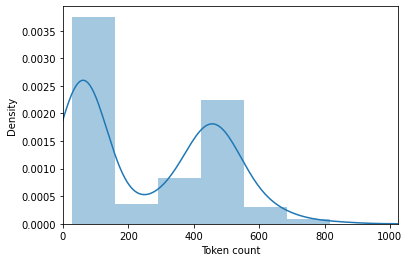

In [48]:
sns.distplot(token_lens)

plt.xlim([0, 1024]);

plt.xlabel('Token count');

In [51]:
MAX_LEN = 512

In [25]:
df['topic'][4]

'Continue to Exercise Caution When it Comes to Palantir Stock'

In [26]:
df['content'][4]

'Did Palantir (NYSE:PLTR) stock find its floor at price just under $20 per share? And, if so, can the data analytics play’s bounce back over the past few weeks continue? Yes and no. On one hand, last month’s pullback in hindsight may have more of a hiccup than the continuation of a move towards its $10 per share direct listing price. Source: Ascannio / Shutterstock.com Fears of rising inflation, and in turn, rising interest rates, which is bad for growth stocks, may have been what caused the stock’s brief drop below $20 per share. But, as investors start to shrug off these concerns, Palantir shares may have a path to soar back to $30 per share (and beyond). On the other hand, it’s not as if the coast is fully clear for growth names like this one. The higher rates of inflation we’ve seen in recent months could be here to stay. If so, the Federal Reserve may end up having to raise rates, as recently feared. This could result in valuation contraction for this richly-priced “hot stock.” In

In [31]:
result = predict(text,bertmodel)

06/15/2021 19:15:55 - INFO - finbert.utils -   *** Example ***
06/15/2021 19:15:55 - INFO - finbert.utils -   guid: 0
06/15/2021 19:15:55 - INFO - finbert.utils -   tokens: [CLS] continue to exercise caution when it comes to pal ##ant ##ir stock [SEP]
06/15/2021 19:15:55 - INFO - finbert.utils -   input_ids: 101 3613 2000 6912 14046 2043 2009 3310 2000 14412 4630 4313 4518 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
06/15/2021 19:15:55 - INFO - finbert.utils -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
06/15/2021 19:15:55 - INFO - finbert.utils -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
06/15/2021 19:15:55 - INFO - finbert.utils -   label: None (id = 9090)
06/15/2021 19:15:55 - INFO - root -   tensor([[ 0.1479, -2.1019,  2

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [37]:
tokenizer = BertTokenizer.from_pretrained(lm_path)

In [52]:
encoded_text = tokenizer.encode_plus(

  text,

  max_length=MAX_LEN,

  add_special_tokens=True,

  return_token_type_ids=False,

  padding=True,

  return_attention_mask=True,

  return_tensors='pt',

)

In [53]:
encoded_text

{'input_ids': tensor([[  101,  3613,  2000,  6912, 14046,  2043,  2009,  3310,  2000, 14412,
          4630,  4313,  4518,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [56]:
input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)
output = bertmodel(input_ids, attention_mask)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.1479, -2.1019,  2.1384]], grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)